In [15]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [16]:
tickers = ["BLK", "BAC", "AAPL", "TM", "WMT",
           "JD", "INTU", "MA", "UL", "CVS",
           "DIS", "AMD", "NVDA", "PBI", "TGT"]

In [17]:
ohlc = yf.download(tickers, period="5y")

[*********************100%***********************]  15 of 15 completed


In [18]:
ohlc.tail()
prices = ohlc["Close"].dropna(how="all")
prices.tail()     

Ticker,AAPL,AMD,BAC,BLK,CVS,DIS,INTU,JD,MA,NVDA,PBI,TGT,TM,UL,WMT
Date,,,,,,,,,,,,,,,
2024-12-26,259.019989,125.059998,44.549999,1054.280029,44.919998,112.550003,646.190002,36.130001,536.150024,139.929993,7.33,136.389999,197.360001,57.520000,92.790001
2024-12-27,255.589996,125.190002,44.340000,1044.180054,44.490002,111.550003,638.570007,34.980000,532.200012,137.009995,7.29,135.500000,199.520004,57.459999,91.660004
2024-12-30,252.199997,122.440002,43.910000,1027.430054,43.939999,110.800003,630.299988,34.259998,525.549988,137.490005,7.24,135.050003,195.660004,56.759998,90.570000
2024-12-31,250.419998,120.790001,43.950001,1025.109985,44.889999,111.349998,628.500000,34.669998,526.570007,134.289993,7.24,135.179993,194.610001,56.700001,90.349998
2025-01-02,243.850006,120.629997,44.290001,1017.400024,44.220001,110.820000,622.789978,34.230000,522.400024,138.309998,7.22,137.190002,193.119995,56.520000,90.000000


<Axes: xlabel='Date'>

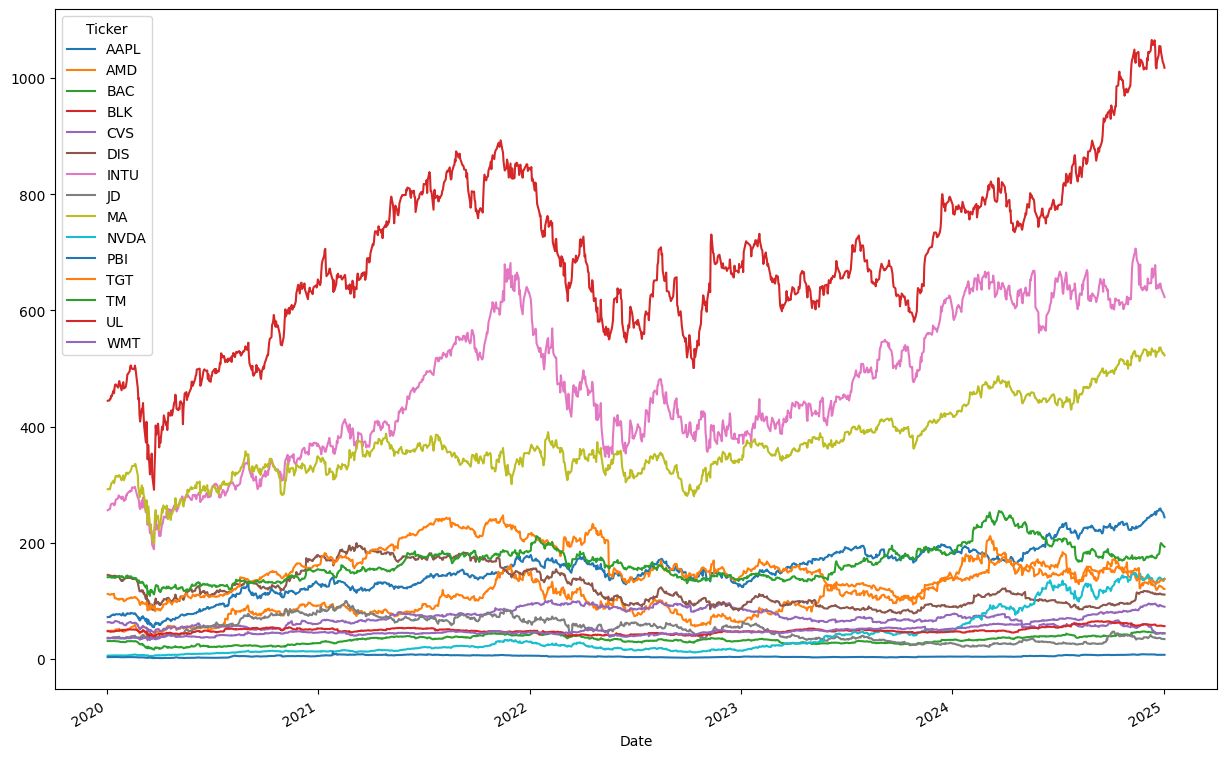

In [19]:
prices[prices.index >= "2020-01-01"].plot(figsize=(15,10))

In [20]:
# Calculate the covariance matrix 

from pypfopt import risk_models
from pypfopt import plotting

sample_cov = risk_models.sample_cov(prices, frequency=252)
sample_cov
     


Ticker,AAPL,AMD,BAC,BLK,CVS,DIS,INTU,JD,MA,NVDA,PBI,TGT,TM,UL,WMT
Ticker,,,,,,,,,,,,,,,
AAPL,0.100480,0.093336,0.046723,0.058485,0.028889,0.047197,0.077176,0.060937,0.058125,0.103311,0.068306,0.040592,0.032730,0.025876,0.025983
AMD,0.093336,0.275177,0.058357,0.076884,0.034216,0.062586,0.111733,0.097840,0.071233,0.211074,0.076353,0.060480,0.049841,0.026854,0.026872
BAC,0.046723,0.058357,0.127667,0.075813,0.051152,0.070673,0.060901,0.045347,0.065339,0.060617,0.109677,0.047917,0.042503,0.029737,0.020577
BLK,0.058485,0.076884,0.075813,0.099218,0.037739,0.060441,0.074115,0.054747,0.064422,0.088754,0.081507,0.047004,0.039760,0.033344,0.023828
CVS,0.028889,0.034216,0.051152,0.037739,0.092646,0.030126,0.029454,0.019251,0.031443,0.026289,0.046862,0.034910,0.022704,0.020427,0.022400
DIS,0.047197,0.062586,0.070673,0.060441,0.030126,0.115331,0.062145,0.046488,0.064392,0.070655,0.082731,0.040050,0.035257,0.023579,0.017881
INTU,0.077176,0.111733,0.060901,0.074115,0.029454,0.062145,0.141453,0.072025,0.073843,0.127283,0.065925,0.050890,0.037614,0.030061,0.025634
JD,0.060937,0.097840,0.045347,0.054747,0.019251,0.046488,0.072025,0.311711,0.048202,0.100904,0.071460,0.047378,0.038846,0.026051,0.012969
MA,0.058125,0.071233,0.065339,0.064422,0.031443,0.064392,0.073843,0.048202,0.095956,0.081152,0.069537,0.035231,0.035809,0.028216,0.019589


<Axes: >

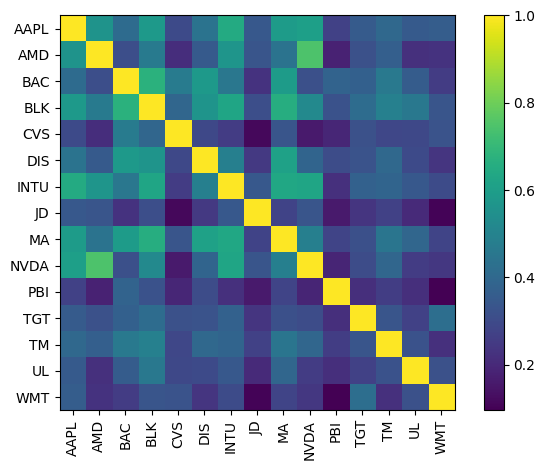

In [21]:
plotting.plot_covariance(sample_cov, plot_correlation=True)
     

However, the sample covariance matrix should not be the default choice for risk model. In the below we will use Ledoit-Wolf shrinkage that reduces extreme values.

In [22]:
from pypfopt import expected_returns

mu = expected_returns.capm_return(prices)
mu

Ticker
AAPL    0.195971
AMD     0.300868
BAC     0.206096
BLK     0.206787
CVS     0.119303
DIS     0.187255
INTU    0.234821
JD      0.237960
MA      0.190179
NVDA    0.319922
PBI     0.353414
TGT     0.167800
TM      0.129506
UL      0.096599
WMT     0.080674
Name: mkt, dtype: float64

In [23]:
from pypfopt import EfficientFrontier
S = risk_models.CovarianceShrinkage(prices).ledoit_wolf()
ef = EfficientFrontier(mu, S, weight_bounds = (0,1))

In [24]:
ef.max_sharpe()
weights = ef.clean_weights()
weights

OrderedDict([('AAPL', 0.06687),
             ('AMD', 0.06764),
             ('BAC', 0.06813),
             ('BLK', 0.06818),
             ('CVS', 0.06608),
             ('DIS', 0.0666),
             ('INTU', 0.06768),
             ('JD', 0.06724),
             ('MA', 0.06696),
             ('NVDA', 0.0682),
             ('PBI', 0.06775),
             ('TGT', 0.0675),
             ('TM', 0.06437),
             ('UL', 0.0637),
             ('WMT', 0.06308)])

In [25]:
ef.portfolio_performance(verbose = True)

Expected annual return: 20.3%
Annual volatility: 24.2%
Sharpe Ratio: 0.84


(np.float64(0.2032486427982147),
 np.float64(0.2424510314451033),
 np.float64(0.8383080145577151))

## Adding an ESG score constraint

In [26]:
esg_scores = [0.8, 0.8, 0.4, 0.3, 0.3, 0.5, 0.3, 0.6, 0.7, 0.2, 0.4, 0.1, 0.5, 0.4, 0.8]

In [27]:
portfolio_min_score = 0.6 # create a portfolio with min 0.6 ESG score

In [28]:
ef_esg = EfficientFrontier(mu, S)
ef_esg.add_constraint(lambda w: esg_scores @ w >= portfolio_min_score)
ef_esg.max_sharpe()

OrderedDict([('AAPL', 0.1279724671325213),
             ('AMD', 0.1103269482272649),
             ('BAC', 0.0740873527514203),
             ('BLK', 0.0293696450832936),
             ('CVS', 0.0252973244216414),
             ('DIS', 0.0656211990211619),
             ('INTU', 0.0268019832863466),
             ('JD', 0.0733144620755192),
             ('MA', 0.1204166498029725),
             ('NVDA', 0.0226299966155125),
             ('PBI', 0.0682362318057763),
             ('TGT', 0.0165387123123069),
             ('TM', 0.0659145034571568),
             ('UL', 0.0275393126366536),
             ('WMT', 0.1459332113704523)])

In [29]:
ef_esg.portfolio_performance(verbose = True)

Expected annual return: 19.9%
Annual volatility: 24.0%
Sharpe Ratio: 0.83


(np.float64(0.19866151495667878),
 np.float64(0.23968222079497317),
 np.float64(0.8288537810512697))

<Axes: xlabel='Volatility', ylabel='Return'>

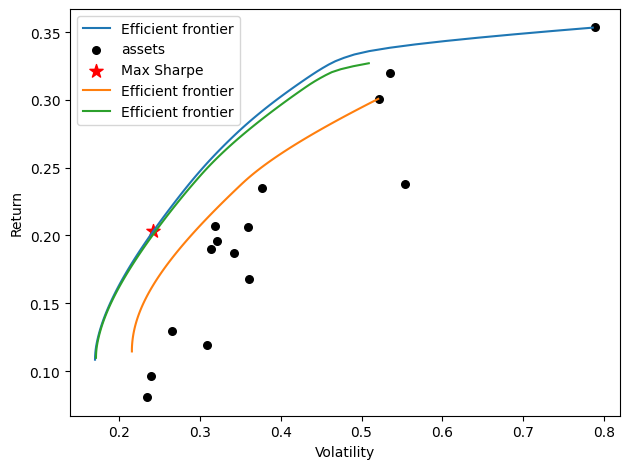

In [30]:
ef = EfficientFrontier(mu, S, weight_bounds = (0,1))
fig, ax = plt.subplots()
ef_max_sharpe = ef.deepcopy()
plotting.plot_efficient_frontier(ef, ax=ax, show_assets=True)

# Find the tangency portfolio
ef_max_sharpe.max_sharpe()
ret_tangent, std_tangent, _ = ef_max_sharpe.portfolio_performance()
ax.scatter(std_tangent, ret_tangent, marker="*", s=100, c="r", label="Max Sharpe")

ef_esg_aggressive = EfficientFrontier(mu, S)
portfolio_min_score = 0.8
ef_esg_aggressive.add_constraint(lambda w: esg_scores @ w >= portfolio_min_score)
plotting.plot_efficient_frontier(ef_esg_aggressive, ax=ax, show_assets=False)

ef_esg_mild = EfficientFrontier(mu, S)
portfolio_min_score = 0.6
ef_esg_mild.add_constraint(lambda w: esg_scores @ w >= portfolio_min_score)
plotting.plot_efficient_frontier(ef_esg_mild, ax=ax, show_assets=False)


In [31]:
ef_esg_mild = EfficientFrontier(mu, S)
portfolio_min_score = 0.6
ef_esg_mild.add_constraint(lambda w: esg_scores @ w >= portfolio_min_score)
ef_esg_mild.max_sharpe()
esg_mild = ef_esg_mild.portfolio_performance(verbose = False)

In [32]:
ef_esg_aggressive = EfficientFrontier(mu, S)
portfolio_min_score = 0.8
ef_esg_aggressive.add_constraint(lambda w: esg_scores @ w >= portfolio_min_score)
ef_esg_aggressive.max_sharpe()
esg_agg = ef_esg_aggressive.portfolio_performance(verbose = False)

In [33]:
ef = EfficientFrontier(mu, S, weight_bounds = (0,1))
ef.max_sharpe()
no_esg = ef.portfolio_performance(verbose = False)

In [34]:
df = pd.DataFrame({'no_esg_constraints' : no_esg, 'mild_esg_target' : esg_mild, 'aggressive_esg_target' : esg_agg})
df.index = ['Expected ann return', 'Ann Vol', 'Sharpe Ratio']
df

,no_esg_constraints,mild_esg_target,aggressive_esg_target
Expected ann return,0.203249,0.198662,0.194977
Ann Vol,0.242451,0.239682,0.281799
Sharpe Ratio,0.838308,0.828854,0.691904
